In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
merge_table = pd.merge(mouse_df, clinical_df, on="Mouse ID", how="outer")



# Display the data table for preview
merge_table.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_df = merge_table.groupby(['Drug', 'Timepoint'])

# Convert to DataFrame

mean = grouped_df.mean()
mean

# Preview DataFrame


Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
          25                  39.939528          0.818182
          30                  38.769339          1.090909
          35                  37.816839          1.181818
          40                  36.958001          1.380952
          45                  36.236114          1.476190
Ceftamin  0                   45.000000          0.000000
          5                   46.503051          0.380952
          10                  48.285125          0.600000
          15                  50.094055          0.789474
          20                  52.157049          1.111111
          25                  54.287674          1.500000
          30                  56.769517          1.937500
          35                  58.827548          2.071429
          40                  61.467895          2.357143
          45                  64.132421          2.692308
Infubinol 0                   45.000000          0.000000
          5                   47.062001          0.280000
          10                  49.403909          0.666667
          15                  51.296397          0.904762
          20                  53.197691          1.050000
          25                  55.715252          1.277778
          30                  58.299397          1.588235
          35                  60.742461          1.666667
          40                  63.162824          2.100000
          45                  65.755562          2.111111
...                                 ...               ...
Ramicane  0                   45.000000          0.000000
          5                   43.944859          0.120000
          10                  42.531957          0.250000
          15                  41.495061          0.333333
          20                  40.238325          0.347826
          25                  38.974300          0.652174
          30                  38.703137          0.782609
          35                  37.451996          0.952381
          40                  36.574081          1.100000
          45                  34.955595          1.250000
Stelasyn  0                   45.000000          0.000000
          5                   47.527452          0.240000
          10                  49.463844          0.478261
          15                  51.529409          0.782609
          20                  54.067395          0.952381
          25                  56.166123          1.157895
          30                  59.826738          1.388889
          35                  62.440699          1.562500
          40                  65.356386          1.583333
          45                  68.438310          1.727273
Zoniferol 0                   45.000000          0.000000
          5                   46.851818          0.166667
          10                  48.689881          0.500000
          15                  50.779059          0.809524
          20                  53.170334          1.294118
          25                  55.432935          1.687500
          30                  57.713531          1.933333
          35                  60.089372          2.285714
          40                  62.916692          2.785714
          45                  65.960888          3.071429

[100 rows x 2 columns]

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

#grouped_df['SE'] = sem(grouped_df['Tumor Volume (mm3)'])
sems = merge_table.groupby(['Drug', 'Timepoint']).sem()
mean["SE"] = sems["Tumor Volume (mm3)"]
mean.head()
# Convert to DataFrame

# Preview DataFrame



Tumor Volume (mm3)  Metastatic Sites        SE
Drug      Timepoint                                                
Capomulin 0                   45.000000          0.000000  0.000000
          5                   44.266086          0.160000  0.448593
          10                  43.084291          0.320000  0.702684
          15                  42.064317          0.375000  0.838617
          20                  40.716325          0.652174  0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
vol = mean["Tumor Volume (mm3)"]

#capomulin = vol[vol['Drug'] == 'Capomulin']
vol_df = pd.DataFrame(data=vol)
#vol_df = vol_df.set_index(['Timepoint'])
vol_df
vol_df2 = vol_df.pivot_table(
    values='Tumor Volume (mm3)', index='Timepoint', columns='Drug',
    fill_value=0, aggfunc='mean')
vol_df2
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


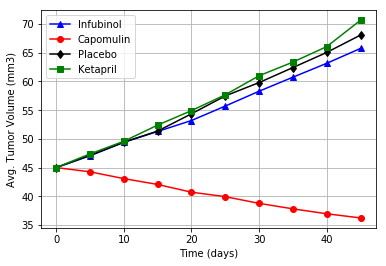

In [5]:
# Generate the Plot (with Error Bars)
infub = vol_df2['Infubinol']
capo = vol_df2['Capomulin']
plac = vol_df2['Placebo']
ketap = vol_df2['Ketapril']
x_axis = np.arange(0, 50, 5)

# Save the Figure
plt.plot(x_axis, infub, color="b", marker="^")
plt.plot(x_axis, capo, color="r", marker="o")
plt.plot(x_axis, plac, color="black", marker="d")
plt.plot(x_axis, ketap, color="g", marker="s")

plt.grid(True)
plt.xlabel("Time (days)")
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.legend()
plt.show()

In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta = mean["Metastatic Sites"]

meta_df = pd.DataFrame(data=meta)
# Convert to DataFrame
meta_df["SE"] = sems["Metastatic Sites"]

meta_df.head()
# Preview DataFrame


Metastatic Sites        SE
Drug      Timepoint                            
Capomulin 0                  0.000000  0.000000
          5                  0.160000  0.074833
          10                 0.320000  0.125433
          15                 0.375000  0.132048
          20                 0.652174  0.161621

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
#see above
# Convert to DataFrame

# Preview DataFrame


In [9]:
# Minor Data Munging to Re-Format the Data Frames

meta_df2 = meta_df.pivot_table(
    values='Metastatic Sites', index='Timepoint', columns='Drug',
    fill_value=0, aggfunc='mean')
meta_df2.head()
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


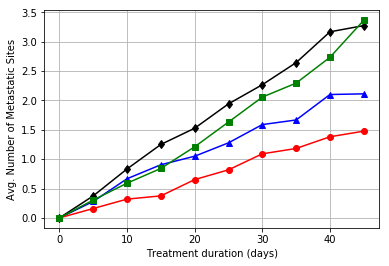

In [10]:
# Generate the Plot (with Error Bars)
infub2 = meta_df2['Infubinol']
capo2 = meta_df2['Capomulin']
plac2 = meta_df2['Placebo']
ketap2 = meta_df2['Ketapril']
x_axis2 = np.arange(0, 50, 5)

# Save the Figure
plt.plot(x_axis, infub2, color="b", marker="^")
plt.plot(x_axis, capo2, color="r", marker="o")
plt.plot(x_axis, plac2, color="black", marker="d")
plt.plot(x_axis, ketap2, color="g", marker="s")

plt.grid(True)
plt.xlabel("Treatment duration (days)")
plt.ylabel("Avg. Number of Metastatic Sites")
plt.show()
# Save the Figure

# Show the Figure


## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count = grouped_df.count()
mouse = count["Mouse ID"]

#capomulin = vol[vol['Drug'] == 'Capomulin']
mouse_df = pd.DataFrame(data=mouse)
mouse_df.head()
vol_df2 = vol_df.pivot_table(
    values='Tumor Volume (mm3)', index='Timepoint', columns='Drug',
    fill_value=0, aggfunc='mean')
vol_df2

# Convert to DataFrame

# Preview DataFrame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [17]:
# Minor Data Munging to Re-Format the Data Frames
mouse_df2 = mouse_df.pivot_table(
    values='Mouse ID', index='Timepoint', columns='Drug',
    fill_value=0, aggfunc='mean')

mouse_df3 = mouse_df2.divide(mouse_df2.iloc[0], axis='columns')
mouse_df3






Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,1.00,1.00,1.00,1.00,1.00,1.00,1.000000,1.00,1.000000,1.00
5,1.00,0.84,1.00,0.92,0.92,0.96,0.961538,1.00,0.961538,0.96
10,1.00,0.80,0.84,0.88,0.84,0.96,0.884615,0.96,0.884615,0.88
15,0.96,0.76,0.84,0.76,0.84,0.80,0.653846,0.96,0.884615,0.84
20,0.92,0.72,0.80,0.76,0.80,0.76,0.653846,0.92,0.807692,0.68
25,0.88,0.72,0.72,0.76,0.72,0.68,0.538462,0.92,0.730769,0.64
30,0.88,0.64,0.68,0.72,0.60,0.60,0.500000,0.92,0.692308,0.60
35,0.88,0.56,0.48,0.68,0.60,0.56,0.384615,0.84,0.615385,0.56
40,0.84,0.56,0.40,0.60,0.60,0.48,0.346154,0.80,0.461538,0.56


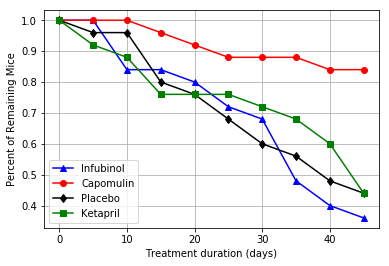

In [19]:
# Generate the Plot (Accounting for percentages)
infub3 = mouse_df3['Infubinol']
capo3 = mouse_df3['Capomulin']
plac3 = mouse_df3['Placebo']
ketap3 = mouse_df3['Ketapril']
x_axis3 = np.arange(0, 50, 5)

# Save the Figure
plt.plot(x_axis, infub3, color="b", marker="^")
plt.plot(x_axis, capo3, color="r", marker="o")
plt.plot(x_axis, plac3, color="black", marker="d")
plt.plot(x_axis, ketap3, color="g", marker="s")

plt.grid(True)
plt.xlabel("Treatment duration (days)")
plt.ylabel("Percent of Remaining Mice")
plt.legend()
plt.show()
# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

No handles with labels found to put in legend.


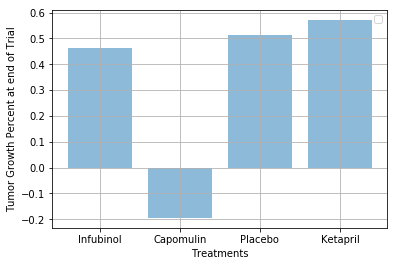

In [33]:
# Calculate the percent changes for each drug
# perc_df = vol_df.divide(vol_df.ix[0] / 100)
# Display the data to confirm
# perc_df2 = perc_df - 100
#perc_df3 = perc_df2[perc_df2['Timepoint']==45]
#perc_df3 = perc_df2.iloc[perc_df2["Timepoint"] == 45]

startingvol = vol_df2.iloc[0]
endingvol = vol_df2.iloc[9]

percchange = (endingvol-startingvol)/startingvol


infub4 = percchange['Infubinol']
capo4 = percchange['Capomulin']
plac4 = percchange['Placebo']
ketap4 = percchange['Ketapril']

percchanges = (infub4, capo4, plac4, ketap4)
drugnames = ('Infubinol', 'Capomulin', 'Placebo', 'Ketapril')

# Save the Figure
plt.bar(drugnames, percchanges, align='center', alpha=0.5)


plt.grid(True)
plt.xlabel("Treatments")
plt.ylabel("Tumor Growth Percent at end of Trial")
plt.legend()
plt.show()


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()